In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing dataset
# Importing Libraries

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data = data.drop(['Invoice ID'],axis=1)

In [3]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income             

There is no missing values in this dataset

In [6]:
data[[i for i in data.columns if data[i].dtypes != 'object']]

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [7]:
 data[[i for i in data.columns if data[i].dtypes == 'object']]

,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [8]:
data['DateTime'] = data['Date']+" "+ data['Time']
data['DateTime'] = pd.to_datetime(data['DateTime'])

First I concat the two features that is date and time into DateTime and then convert that string to datetime

# Data Analysis and Data Cleaning

In [9]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

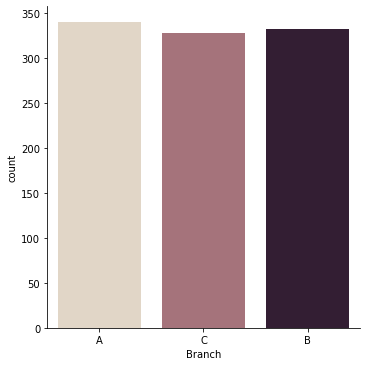

In [10]:
sns.catplot(x="Branch", kind="count", palette="ch:.25", data=data)

# branch A has the highest no of branch.

In [11]:
data['City'].value_counts()#Yangon has the highest branch of supermarket

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

I will drop any of the feature (Branch or City) because both represent same I will drop for City bacuse it will easy for me to use Branch instead

In [12]:
data = data.drop(['City'],axis=1)
data = data.drop(['Date','Time'],axis=1)

In [13]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

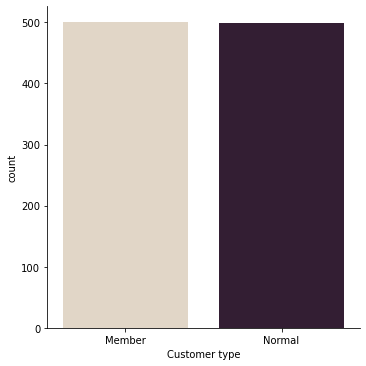

In [14]:
sns.catplot(x="Customer type", kind="count", palette="ch:.25", data=data) #customer type member has the highest no of customers in it

In [15]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

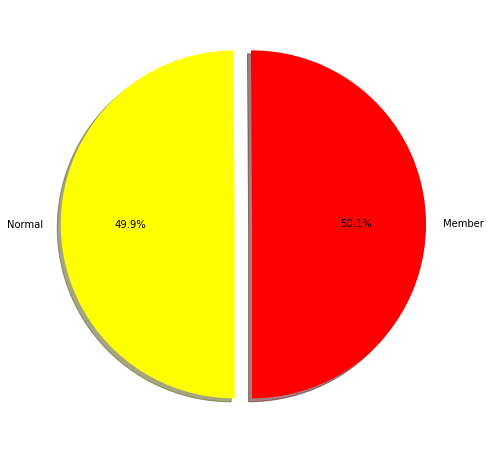

In [16]:
size = data['Customer type'].value_counts(sort=True)
colors = ['Red','Yellow']
labels = ['Member','Normal']
explode = (0,0.1)
plt.figure(figsize=(10 , 8))
plt.pie(size,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)

plt.show()



<AxesSubplot:xlabel='Customer type', ylabel='count'>

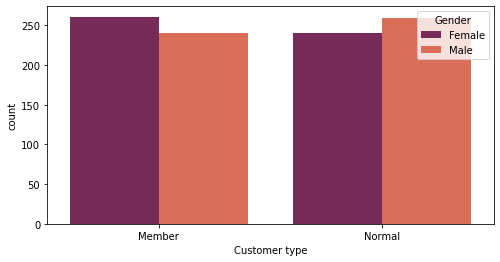

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='Customer type', data= data, palette= "rocket",hue = "Gender")
# in customer type member female are the highest in number
#in customer type normal male are the highest in number.

In [18]:
data['Product line'].value_counts()
#Fashion and accessories is more afford by the customers

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot:xlabel='Product line', ylabel='count'>

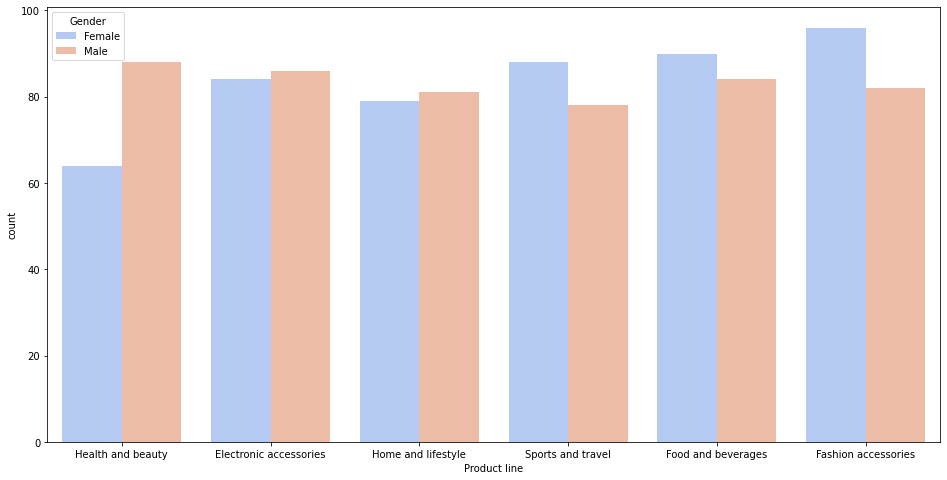

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x='Product line',data=data,palette='coolwarm',hue='Gender')


It is surprising to know that men are buying beauty and health product, women buying Fashion accessories products more.

In [20]:
data['Payment'].value_counts() # ewallet is more preferred by customer

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

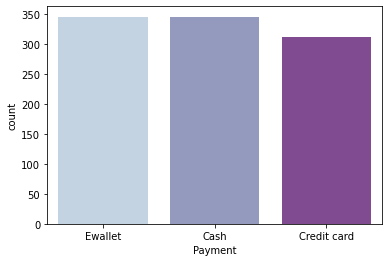

In [21]:
sns.countplot(x=data['Payment'],data=data,palette='BuPu')

<AxesSubplot:xlabel='Product line', ylabel='count'>

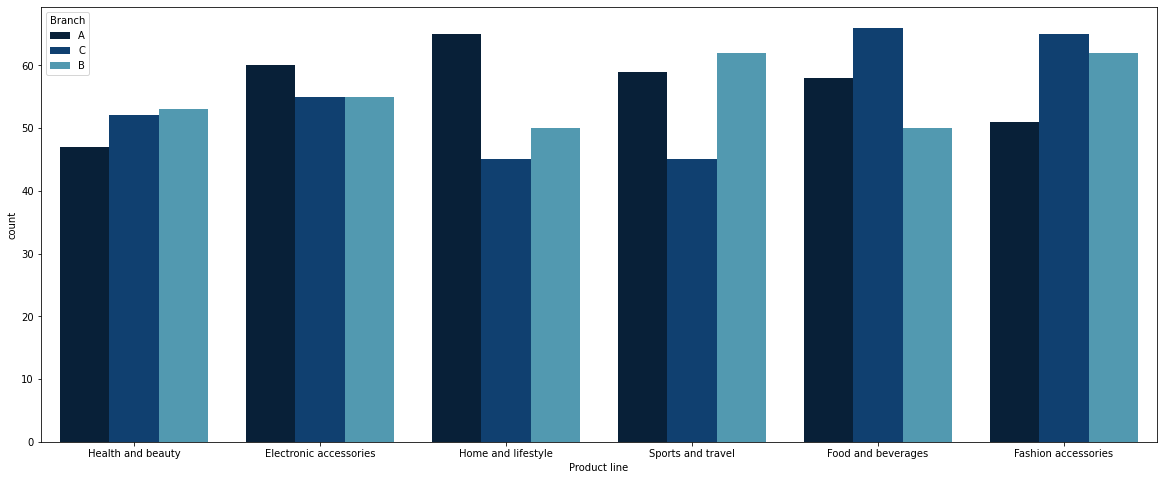

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x='Product line',data=data,palette='ocean',hue='Branch')

 In branch A, Home and lifestyle is mostly preferred by customer.
 In branch B, Food and beverages are more preferred by customer.
 In branch C,sports and travel and fachion accessories are more preferred. 
 

In [23]:
# categorical data
[i for i in data.columns if data[i].dtype == 'object']
data = pd.get_dummies(data,drop_first=True)

In [24]:
#Feature Engineering 

data['TotalbyQuantity'] = data['Total'] / data['Quantity']


In [25]:
# Standardizing the numerical variables
num = data[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = scaler.fit_transform(num)
num = pd.DataFrame(num,columns=['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'])
num

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131
...,...,...,...,...,...,...,...,...,...
995,0.336782,0.000000,0.030707,0.030707,0.030707,0.0,0.030707,0.366667,0.336782
996,0.971295,1.000000,0.980465,0.980465,0.980465,0.0,0.980465,0.066667,0.971295
997,0.242101,0.000000,0.022049,0.022049,0.022049,0.0,0.022049,0.616667,0.242101
998,0.620160,0.000000,0.056622,0.056622,0.056622,0.0,0.056622,0.016667,0.620160


In [26]:
data=data.drop(['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating','TotalbyQuantity'],axis=1)
data = pd.concat([data,num],axis=1)
data.head()

,DateTime,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,...,Payment_Ewallet,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,TotalbyQuantity
0,2019-01-05 13:08:00,0,0,0,0,0,0,1,0,0,...,1,0.718847,0.666667,0.521616,0.521616,0.521616,0.0,0.521616,0.850000,0.718847
1,2019-03-08 10:29:00,0,1,1,0,0,0,0,0,0,...,0,0.057855,0.444444,0.067387,0.067387,0.067387,0.0,0.067387,0.933333,0.057855
2,2019-03-03 13:23:00,0,0,1,1,0,0,0,1,0,...,0,0.403316,0.666667,0.319628,0.319628,0.319628,0.0,0.319628,0.566667,0.403316
3,2019-01-27 20:33:00,0,0,0,1,0,0,1,0,0,...,1,0.535603,0.777778,0.463549,0.463549,0.463549,0.0,0.463549,0.733333,0.535603
4,2019-02-08 10:37:00,0,0,1,1,0,0,0,0,1,...,1,0.848131,0.666667,0.604377,0.604377,0.604377,0.0,0.604377,0.216667,0.848131


In [27]:
data = data.drop(['DateTime'],axis=1)
#Splitting Datas
X = data.drop(['Total'],axis=1)
y= data['Total']

# Splitting the data into Train and Test

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=100)

In [29]:
X_train.shape


(250, 19)

In [30]:
y_train.shape

(250,)

In [31]:
X_test.shape,y_test.shape

((750, 19), (750,))

# Modelling

In [32]:
import pandas as pd
import numpy as np
#Supporting functions
from sklearn.preprocessing import PolynomialFeatures
#Fit Models
from sklearn.linear_model import LinearRegression
#Scoring function
from sklearn.metrics import accuracy_score

# Linear Regression
Linear Regression is a simple supervised machine model which uses linear function on input features to obtain the output

In [33]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
model1.score(X_test,y_test)


1.0

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train, y_train)
dtree.score(X_test,y_test)

0.9990777361609333

 # Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

RForest = RandomForestRegressor()
RForest.fit(X_train, y_train)
RForest.score(X_test,y_test)

0.9996855943361945